In [103]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [104]:
df = pd.read_excel('testegalao_002_vag_0004.xls')

In [105]:
df.head()

,Tempo,Amperagem,Situação
0,10:15:57,0,parado
1,10:15:58,0,parado
2,10:15:59,0,parado
3,10:16:00,0,parado
4,10:16:01,0,parado


In [106]:
df = df.drop([0,1,2,3])

In [107]:
df = df.loc[df['Amperagem'] < 500]

In [108]:
#df['Tempo'] = pd.to_datetime(df['Tempo']).dt.strftime('%H:%M:%S')

#FAZENDO TESTE PARA MELHORAR VARIAÇÃO DA AMPERAGEM QUE SAI NO VISOR DA MÁQUINA / COM AMPERAGEM COLETADA PELO PROMETEUS

In [109]:
alt = int(input('Qual foi a margem de alivio entre o sensor e a máquina de solda?'))
mudar30 = df['Amperagem']
mudar30 = mudar30 + alt

mudar30 = mudar30.replace(alt,0)
df['Amperagem'] = mudar30

In [110]:
dff = df
dff = dff.reset_index() # Gráfico Scatter
situacao = df['Situação'].value_counts() # gráfico de barras para ver o tempo parado ou trabalhando

In [111]:
sec = df.shape[0]

In [112]:
minuto = sec / 60

In [113]:
hora = minuto // 60
hora = int(hora)

In [114]:
modulo = minuto % 60
modulo = int(modulo)

In [115]:
total = f"Total={hora}hora/s:{modulo}minutos"

In [116]:
#Criando linhas de referência  (+10%) (-10%)
arc = int(input("Qual valor da corrente utilizado?"))
porc = arc * 0.10
linhamax = arc + porc
linhamin = arc - porc

arc2 = int(input('Qual a corrente mínima seguindo IE?'))
arc3 = int(input('Qual a corrente máxima seguindo IE?'))


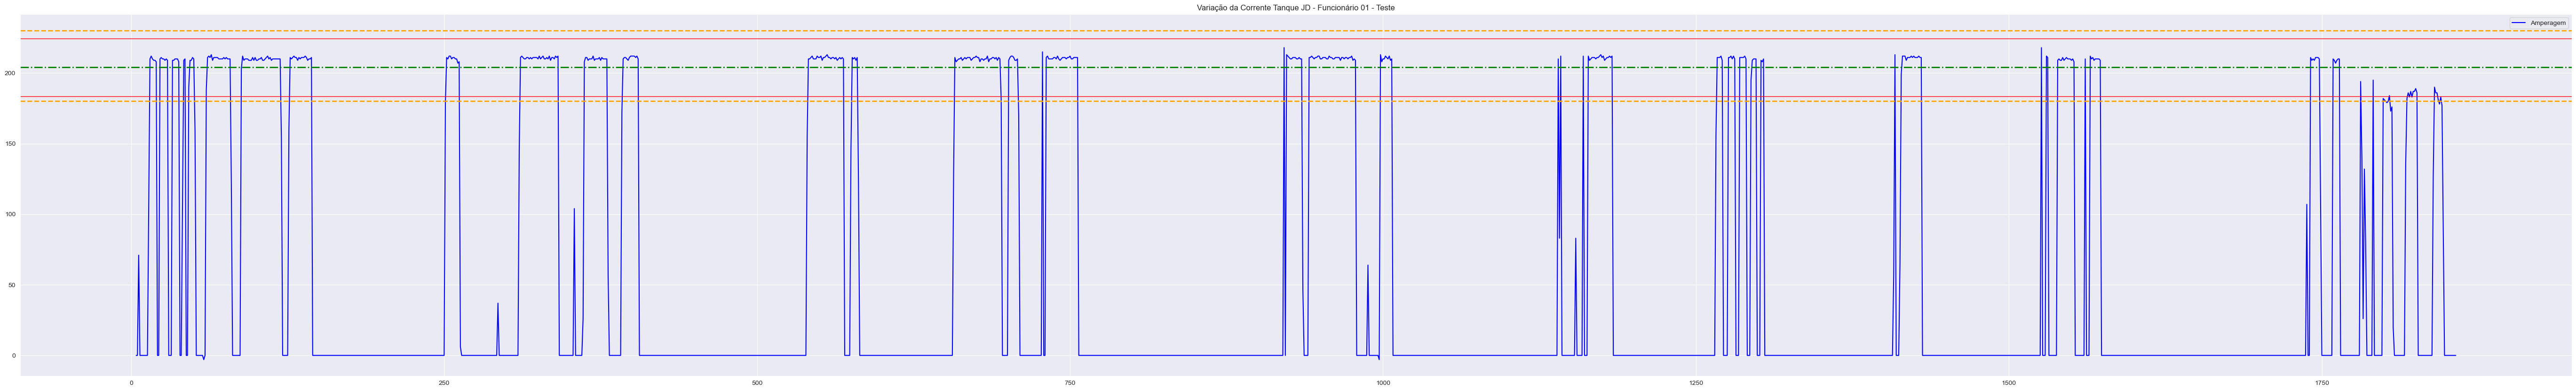

In [126]:
#Plotando gráficos de linha
df.plot(figsize=(70,10), color='blue')

plt.title('Variação da Corrente Tanque JD - Funcionário 01 - Teste')


plt.axhline(linhamax,0,1, color = 'r', **{'lw':1})      
plt.axhline(linhamin,0,1, color = 'r', **{'lw':1})

plt.axhline(arc,0,1, color = 'green',ls = 'dashdot', **{'lw':2})  

plt.axhline(arc3,0,1, color = 'orange',ls = '--', **{'lw':2})      
plt.axhline(arc2,0,1, color = 'orange',ls = '--', **{'lw':2})
plt.show()

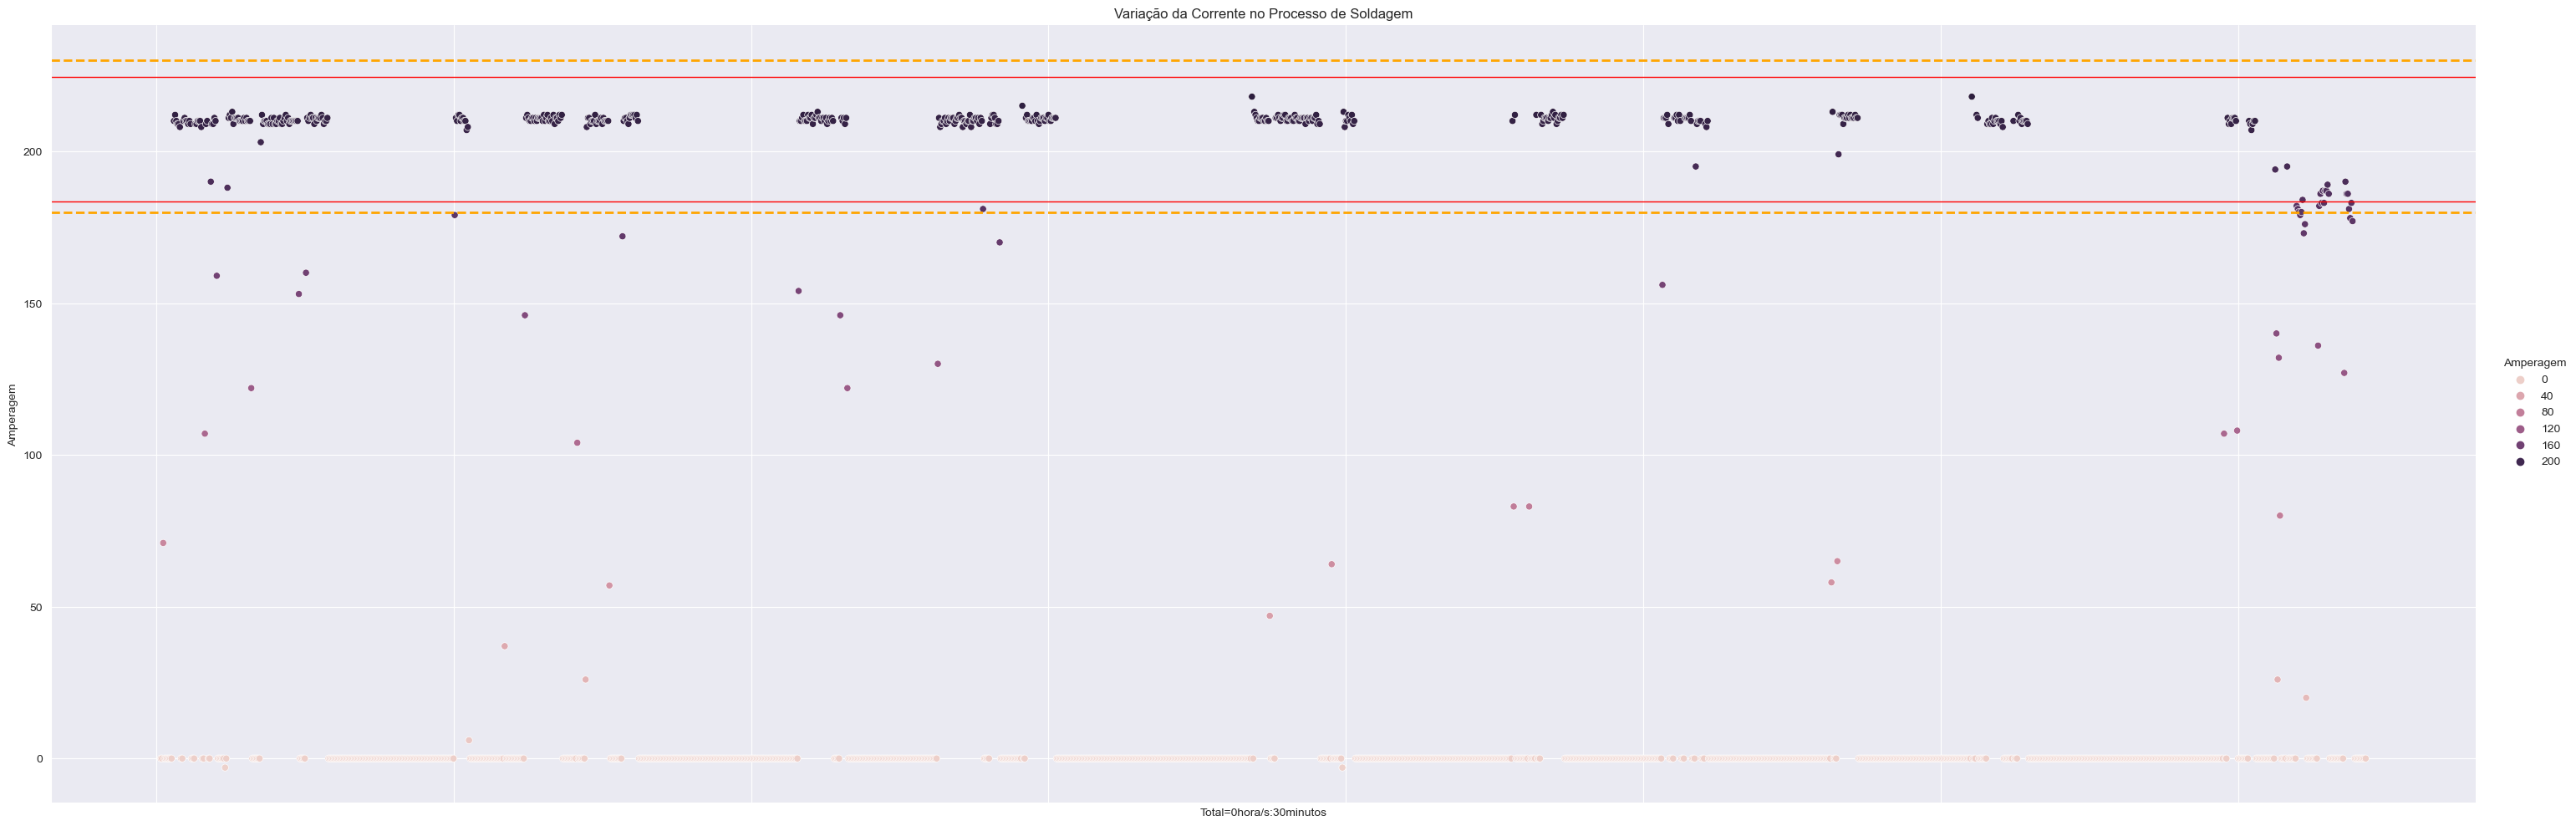

In [118]:
#Plotando gráficos de disperção
sns.set_style('darkgrid')
sns.relplot(data=dff, x='index', y='Amperagem', aspect = 3, height = 10, hue='Amperagem')

plt.title('Variação da Corrente no Processo de Soldagem')
plt.xlabel(total)

plt.axhline(linhamax,0,1, color = 'r', **{'lw':1})
plt.axhline(linhamin,0,1, color = 'r', **{'lw':1})

plt.axhline(arc3,0,1, color = 'orange',ls = '--', **{'lw':2})      
plt.axhline(arc2,0,1, color = 'orange',ls = '--', **{'lw':2})

plt.tick_params(labelbottom = False)

plt.show()

In [119]:
run = df.loc[df['Situação'] == 'trabalhando']
stop= df.loc[df['Situação'] == 'parado']

In [ ]:
run['Situação']=run['Situação'].replace('trabalhando',1)
stop['Situação'] = stop['Situação'].replace('parado',1)

In [121]:
run1 = run['Situação'].sum()

minuto = run1 / 60

hora = minuto // 60
hora = int(hora)

modulo = minuto % 60
modulo = int(modulo)
totalrun1 = f"Arco aberto = {hora}hora/s:{modulo}minutos"


In [122]:
stop1 = stop['Situação'].sum()

In [123]:
minuto = stop1 / 60

hora = minuto // 60
hora = int(hora)

modulo = minuto % 60
modulo = int(modulo)
totalstop1 = f"Arco fechado = {hora}hora/s:{modulo}minutos"


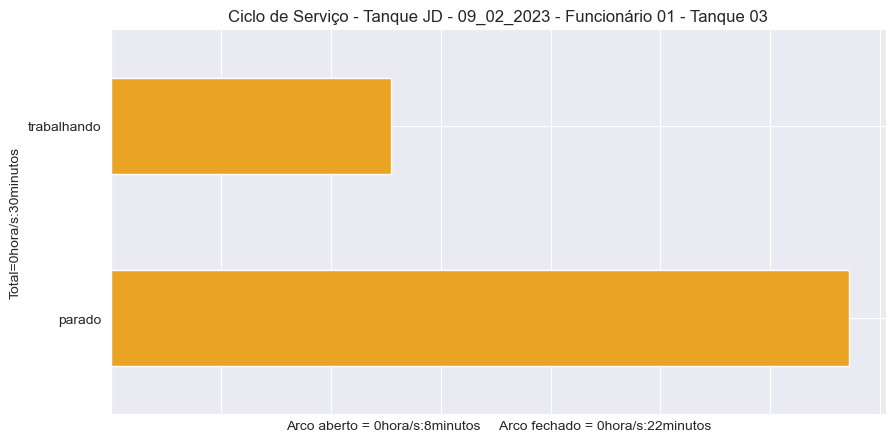

In [124]:
#Plotando gráfico de barras conforme situação
situacao.plot(kind='barh', title = 'Ciclo de Serviço - Tanque JD - 09_02_2023 - Funcionário 01 - Tanque 03', figsize=(10,5), color='#e8a422')
plt.ylabel(f"{total}")
plt.xlabel(f"{totalrun1}     {totalstop1}")
plt.tick_params(labelbottom = False)
plt.show()

In [125]:
dfjj = df
dfjj = df.loc[df['Amperagem'] > 108]
dfjj.describe()

,Amperagem
count,489.000000
mean,206.662577
std,13.424449
min,122.000000
25%,210.000000
50%,210.000000
75%,211.000000
max,218.000000
